### Import packages

In [11]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Load custom dataset in TensorFlow
* Pode ampliar o conjunto todo de dados ou tem que separar entre treino e teste antes e ampliar só as imagens de treino?

* Tutorial TensorFlow

https://www.tensorflow.org/tutorials/load_data/images

In [12]:
def decode_img(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.image.decode_jpeg(img, channels=3)
    # resize the image to the desired size
    return img

In [13]:
def process_path(file_path):
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img

In [16]:
data_dir = '/home/jacq/Documentos/Datasets/pcb_augmented/images'
label_dir = '/home/jacq/Documentos/Datasets/pcb_augmented/labels'

In [17]:
list_ds = tf.data.Dataset.list_files(str(data_dir+'*/*'), shuffle=False)
list_ds = list_ds.shuffle(47, reshuffle_each_iteration=False)

### Data Augmentation
* Tutorial TensorFlow

https://www.tensorflow.org/tutorials/images/data_augmentation

In [18]:
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented)

2042


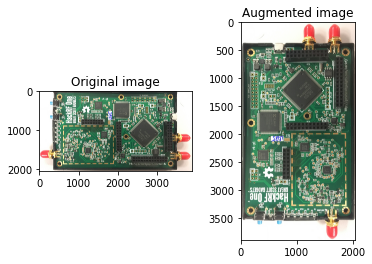

In [19]:
for f in list_ds.take(1):
    image = process_path(f.numpy())
    print(int(tf.shape(image)[0]))
    flipped = tf.image.rot90(image/255)
    visualize(image/255, flipped)

In [20]:
for f in list_ds.take(5):
    image_name = str(f.numpy()).split("/")
    image_name = image_name[-1].split(".")[0]
    print(image_name)

HackRF
SystemAce_Bottom
ArduinoMega_Top
ThingMagicM6e
ML365_Top


### Rotate 90º

In [21]:
list_ds = tf.data.Dataset.list_files(str(data_dir+'*/*'), shuffle=False)
list_ds = list_ds.shuffle(47, reshuffle_each_iteration=False)

In [22]:
def rotate(dataset):
    for f in list_ds:
        # pegar a imagem
        image = process_path(f.numpy())
        # imagem alterada esquerda-direita
        flipped = tf.image.rot90(image/255)
        # nome da imagem FORMATO: blahblah/nome.bah
        image_name = str(f.numpy()).split("/")
        image_name = image_name[-1].split(".")[0]
        # salvar na pasta
        tf.keras.preprocessing.image.save_img(
            path=data_dir+'/'+image_name+'-rot.jpg', 
            x=flipped,
            data_format='channels_last',
            file_format='jpeg', 
            scale=True
        )
        # salvar novos parâmetros
        # abrir o arquivo antigo e fazer um novo com o novo nome
        # e com a nova localização dos bounding boxes
        image_txt = open(label_dir+'/'+image_name+'.txt', 'r')
        flipped_txt = open(label_dir+'/'+image_name+'-rot.txt', 'w')
        for line in image_txt:
            line = line.split()
            aux = line[1]
            line[1] = line[2]
            line[2] = str(1-float(aux))
            flipped_txt.write(line[0]+' '+line[1]+' '+line[2]+' '+line[4]+' '+line[3])
            flipped_txt.write("\n")
        image_txt.close()
        flipped_txt.close()

def rotate(dataset):
    for f in list_ds:
        # pegar a imagem
        image = process_path(f.numpy())
        # imagem alterada esquerda-direita
        flipped = tf.image.rot90(image/255)
        # nome da imagem FORMATO: blahblah/nome.bah
        image_name = str(f.numpy()).split("/")
        image_name = image_name[-1].split(".")[0]
        # salvar na pasta
        tf.keras.preprocessing.image.save_img(
            path=data_dir+'/'+image_name+'-rot.jpg', 
            x=flipped,
            data_format='channels_last',
            file_format='jpeg', 
            scale=True
        )
        # salvar novos parâmetros
        # abrir o arquivo antigo e fazer um novo com o novo nome
        # e com a nova localização dos bounding boxes
        image_txt = open('labels/'+image_name+'.txt', 'r')
        flipped_txt = open('train.txt', 'a')
        flipped_txt.append('/home/jacq/Documentos/Datasets/pcb_train/images/'+image_name+'.jpg')
        for line in image_txt:
            line = line.split()
            xmin = line[0]
            ymin = line[1]
            xmax = line[2]
            ymax = line[3]
            number = line[4]
            # ver qual o cálculo aqui pra escrever
            flipped_txt.append(line[0]+','+line[1]+','+line[2]+','+line[4]+','+line[3])
            flipped_txt.append(" ")
        flipped_txt.append("\n")
        image_txt.close()
        flipped_txt.close()

In [23]:
rotate(list_ds)

### Flip image horizontally

In [24]:
list_ds = tf.data.Dataset.list_files(str(data_dir+'*/*'), shuffle=False)
list_ds = list_ds.shuffle(47, reshuffle_each_iteration=False)

In [25]:
def flip_left_right(dataset):
    for f in list_ds:
        # pegar a imagem
        image = process_path(f.numpy())
        # imagem alterada esquerda-direita
        flipped = tf.image.flip_left_right(image/255)
        # nome da imagem FORMATO: blahblah/nome.bah
        image_name = str(f.numpy()).split("/")
        image_name = image_name[-1].split(".")[0]
        # salvar na pasta
        tf.keras.preprocessing.image.save_img(
            path=data_dir+'/'+image_name+'-h.jpg', 
            x=flipped,
            data_format='channels_last',
            file_format='jpeg', 
            scale=True
        )
        # salvar novos parâmetros
        # abrir o arquivo antigo e fazer um novo com o novo nome
        # e com a nova localização dos bounding boxes
        image_txt = open(label_dir+'/'+image_name+'.txt', 'r')
        flipped_txt = open(label_dir+'/'+image_name+'-h.txt', 'w')
        for line in image_txt:
            line = line.split()
            line[1] = str(1-float(line[1]))
            # line[2] = str(1-float(line[2]))
            i = 1
            for word in line:
                flipped_txt.write(word)
                if i != 5:
                    flipped_txt.write(" ")
                i += 1
            flipped_txt.write("\n")
        image_txt.close()
        flipped_txt.close()

In [26]:
flip_left_right(list_ds)

### Flip image vertically

In [27]:
list_ds = tf.data.Dataset.list_files(str(data_dir+'*/*'), shuffle=False)
list_ds = list_ds.shuffle(47, reshuffle_each_iteration=False)

In [28]:
def flip_up_down(dataset):
    for f in list_ds:
        # pegar a imagem
        image = process_path(f.numpy())
        # imagem alterada esquerda-direita
        flipped = tf.image.flip_up_down(image/255)
        # nome da imagem FORMATO: blahblah/nome.bah
        image_name = str(f.numpy()).split("/")
        image_name = image_name[-1].split(".")[0]
        # salvar na pasta
        tf.keras.preprocessing.image.save_img(
            path=data_dir+'/'+image_name+'-v.jpg', 
            x=flipped,
            data_format='channels_last',
            file_format='jpeg', 
            scale=True
        )
        # salvar novos parâmetros
        # abrir o arquivo antigo e fazer um novo com o novo nome
        # e com a nova localização dos bounding boxes
        image_txt = open(label_dir+'/'+image_name+'.txt', 'r')
        flipped_txt = open(label_dir+'/'+image_name+'-v.txt', 'w')
        for line in image_txt:
            line = line.split()
            # line[1] = str(1-float(line[1]))
            line[2] = str(1-float(line[2]))
            i = 1
            for word in line:
                flipped_txt.write(word)
                if i != 5:
                    flipped_txt.write(" ")
                i += 1
            flipped_txt.write("\n")
        image_txt.close()
        flipped_txt.close()

In [29]:
flip_up_down(list_ds)

### Grayscale

In [30]:
list_ds = tf.data.Dataset.list_files(str(data_dir+'*/*'), shuffle=False)
list_ds = list_ds.shuffle(47, reshuffle_each_iteration=False)

In [31]:
def grayscale(dataset):
    for f in list_ds:
        # pegar a imagem
        image = process_path(f.numpy())
        # imagem alterada esquerda-direita
        flipped = tf.image.rgb_to_grayscale(image/255)
        # nome da imagem FORMATO: blahblah/nome.bah
        image_name = str(f.numpy()).split("/")
        image_name = image_name[-1].split(".")[0]
        # salvar na pasta
        tf.keras.preprocessing.image.save_img(
            path=data_dir+'/'+image_name+'-gray.jpg', 
            x=flipped,
            data_format='channels_last',
            file_format='jpeg', 
            scale=True
        )
        # salvar novos parâmetros
        # abrir o arquivo antigo e fazer um novo com o novo nome
        # e com a nova localização dos bounding boxes
        image_txt = open(label_dir+'/'+image_name+'.txt', 'r')
        flipped_txt = open(label_dir+'/'+image_name+'-gray.txt', 'w')
        for line in image_txt:
            flipped_txt.write(line)
        image_txt.close()
        flipped_txt.close()

In [32]:
grayscale(list_ds)

### Saturation

In [33]:
def saturation(dataset, factor=3):
    for f in list_ds:
        # pegar a imagem
        image = process_path(f.numpy())
        # imagem alterada esquerda-direita
        flipped = tf.image.adjust_saturation(image/255, factor)
        # nome da imagem FORMATO: blahblah/nome.bah
        image_name = str(f.numpy()).split("/")
        image_name = image_name[-1].split(".")[0]
        # salvar na pasta
        tf.keras.preprocessing.image.save_img(
            path=data_dir+'/'+image_name+'-sat'+str(factor)+'.jpg', 
            x=flipped,
            data_format='channels_last',
            file_format='jpeg', 
            scale=True
        )
        # salvar novos parâmetros
        # abrir o arquivo antigo e fazer um novo com o novo nome
        # e com a nova localização dos bounding boxes
        image_txt = open(label_dir+'/'+image_name+'.txt', 'r')
        flipped_txt = open(label_dir+'/'+image_name+'-sat'+str(factor)+'.txt', 'w')
        for line in image_txt:
            flipped_txt.write(line)
        image_txt.close()
        flipped_txt.close()

In [34]:
saturation(list_ds)

### Brightness

In [35]:
def brightness(dataset, factor=0.4):
    for f in list_ds:
        # pegar a imagem
        image = process_path(f.numpy())
        # imagem alterada esquerda-direita
        flipped = tf.image.adjust_saturation(image/255, factor)
        # nome da imagem FORMATO: blahblah/nome.bah
        image_name = str(f.numpy()).split("/")
        image_name = image_name[-1].split(".")[0]
        # salvar na pasta
        tf.keras.preprocessing.image.save_img(
            path=data_dir+'/'+image_name+'-bright'+str(factor)+'.jpg', 
            x=flipped,
            data_format='channels_last',
            file_format='jpeg', 
            scale=True
        )
        # salvar novos parâmetros
        # abrir o arquivo antigo e fazer um novo com o novo nome
        # e com a nova localização dos bounding boxes
        image_txt = open(label_dir+'/'+image_name+'.txt', 'r')
        flipped_txt = open(label_dir+'/'+image_name+'-bright'+str(factor)+'.txt', 'w')
        for line in image_txt:
            flipped_txt.write(line)
        image_txt.close()
        flipped_txt.close()

In [36]:
brightness(list_ds)